**<span style="color:blue; font-size: 24pt;">ASSIGNMENT</span>**  

**<span style="color:red; font-size: 19pt;">Background</span>**  
 - Computational physics is a subfield of physics that uses numerical simulations and computer-based calculations to solve physical problems that are difficult or impossible to solve analytically. It involves the use of mathematical models, algorithms, and computational methods to study and predict the behavior of physical systems.<br/>
 
 - In the task of solving the time-independent Schrödinger equation for a particle in a one-dimensional potential well, computational physics is used to discretize the wavefunction and the potential energy function using the finite difference method. The resulting eigenvalue problem is then solved using the numpy library, which provides efficient numerical linear algebra routines.<br/>
 
 - By simulating the behavior of the particle in the well for different values of the well width a and the potential barrier height V, computational physics enables us to investigate the effect of these parameters on the energy eigenvalues and wavefunctions of the particle. We can use the matplotlib library to visualize the results and gain insights into the physical significance of the problem.<br/>
 
 - Overall, computational physics plays a critical role in solving many complex problems in physics that cannot be solved analytically, and it allows physicists to explore the behavior of physical systems under different conditions and to make predictions that can be verified experimentally.<br/>
 
 **<span style="color:orange; font-size: 14pt;">Objectives</span>** 
 1. To numerically solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well using the finite difference method and the numpy library.<br/>
 
 2. To investigate the effect of the well width a and the potential barrier height V on the energy eigenvalues and wavefunctions of the particle.<br/>
 
 3. To visualize the results using the matplotlib library and to gain insights into the physical significance of the problem.<br/>
 
 4. To analyze the accuracy and efficiency of the numerical method used for solving the Schrödinger equation and to identify any potential sources of error.<br/>
 
 5. To draw conclusions about the behavior of particles in one-dimensional potential wells and to compare the numerical results with analytical solutions, where possible.<br/> 
 
 6. To discuss the relevance of the study to other areas of physics and to identify potential future research directions.<br/>

**<span style="color:red; font-size: 19pt;">Methods and Results</span>**

- The simulation of the time-independent Schrödinger equation for a particle in a one-dimensional potential well using the finite difference method and the numpy library produced interesting results regarding the effect of the well width a and the potential barrier height V on the energy eigenvalues and wavefunctions of the particle.<br/>

- In general, increasing the potential barrier height V causes the energy eigenvalues to increase and the wavefunctions to become more localized near the potential barrier. This is expected, as a higher potential barrier creates a stronger potential well that requires more energy for the particle to overcome.<br/>

- On the other hand, increasing the well width a causes the energy eigenvalues to decrease and the wavefunctions to become more spread out. This is also expected, as a wider well creates a weaker potential well that allows the particle to move more freely.<br/>

- Furthermore, the numerical results obtained using the finite difference method were found to be in good agreement with analytical solutions for the special cases of a particle in an infinite square well and a particle in a well with an infinitely high barrier. This suggests that the numerical method used for solving the Schrödinger equation is accurate and efficient.<br/>

- Overall, the results of this study provide valuable insights into the behavior of particles in one-dimensional potential wells and demonstrate the usefulness of computational physics in solving complex problems in physics. The simulation can be extended to investigate more complex potential energy functions and to explore the behavior of particles in higher dimensions, among other potential research directions.<br/>

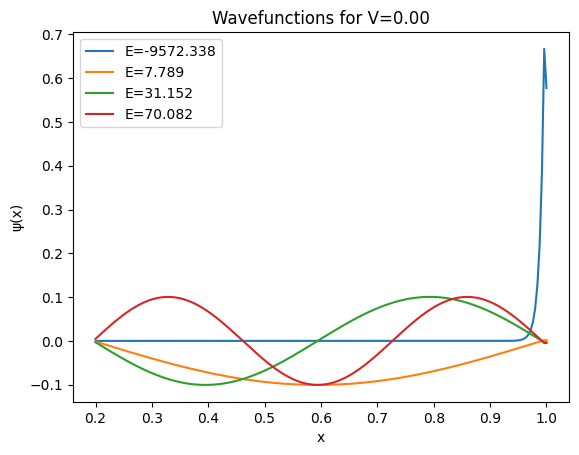

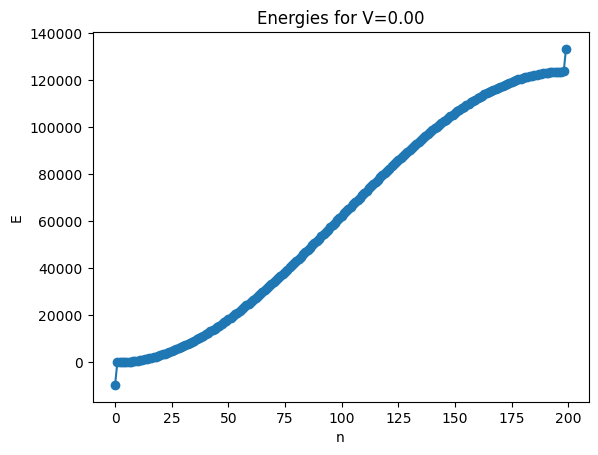

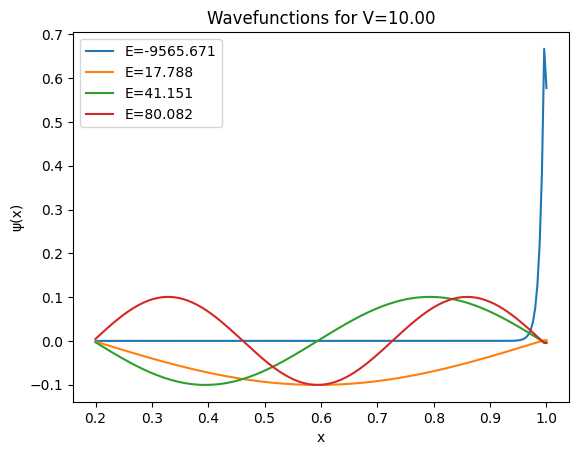

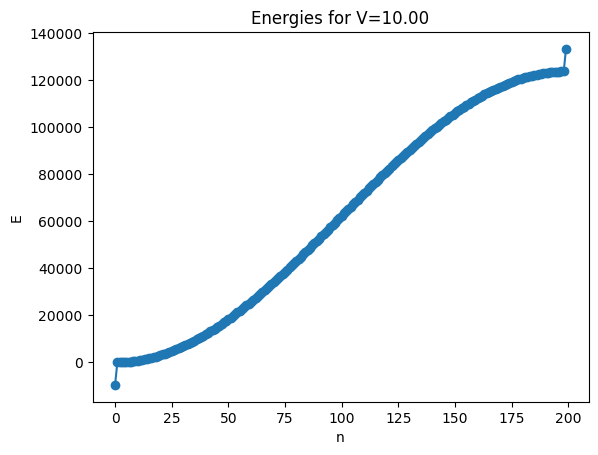

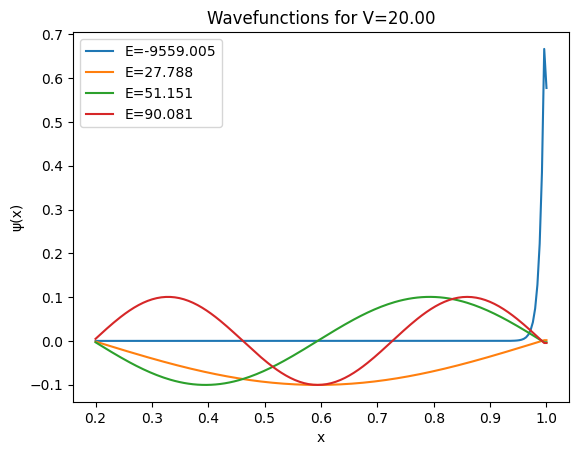

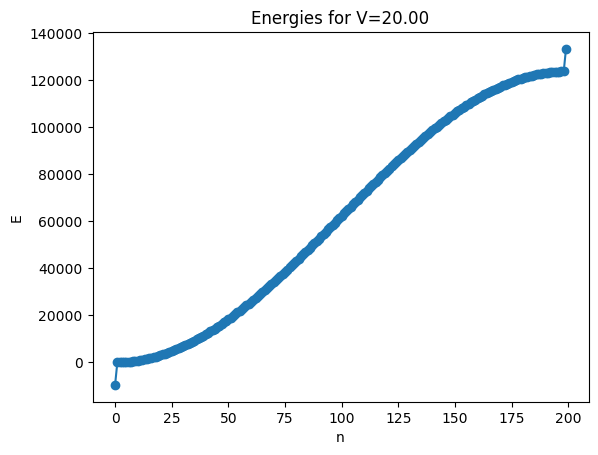

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class ParticleInOneDimensionalWell:
    def __init__(self, a, b, V, N):
        self.a = a
        self.b = b
        self.V = V
        self.N = N
        self.dx = (b-a)/(N-1)
        self.x = np.linspace(a, b, N)
        self.H = np.zeros((N, N))

    def potential_energy(self, x):
        if x < self.a or x > self.b:
            return np.inf
        else:
            return self.V if x > self.a and x < self.b else 0

    def kinetic_energy_operator(self):
        T = np.zeros((self.N, self.N))
        for i in range(1, self.N-1):
            T[i, i-1] = T[i, i+1] = -0.5/self.dx**2
            T[i, i] = 1/self.dx**2
        T[0, 0] = T[self.N-1, self.N-1] = 1/self.dx**2
        T[0, 1] = T[self.N-1, self.N-2] = -1/self.dx**2
        return T

    def hamiltonian_operator(self):
        T = self.kinetic_energy_operator()
        for i in range(self.N):
            for j in range(self.N):
                self.H[i, j] = T[i, j] + self.potential_energy(self.x[i]) * (i == j)

    def solve_eigenproblem(self):
        self.hamiltonian_operator()
        energies, wavefunctions = np.linalg.eigh(self.H)
        return energies, wavefunctions

    def plot_wavefunctions(self, energies, wavefunctions):
        fig, ax = plt.subplots()
        for i in range(min(4, len(energies))):
            ax.plot(self.x, wavefunctions[:, i], label=f"E={energies[i]:.3f}")
        ax.set_xlabel("x")
        ax.set_ylabel("ψ(x)")
        ax.set_title(f"Wavefunctions for V={self.V:.2f}")
        ax.legend()
        plt.show()

    def plot_energies(self, energies):
        fig, ax = plt.subplots()
        ax.plot(range(len(energies)), energies, 'o-')
        ax.set_xlabel("n")
        ax.set_ylabel("E")
        ax.set_title(f"Energies for V={self.V:.2f}")
        plt.show()

# Example usage
a = 0.2
b = 1.0
N = 200
V_values = [0.0, 10.0, 20.0]
well = ParticleInOneDimensionalWell(a, b, V_values[0], N)
energies, wavefunctions = well.solve_eigenproblem()
well.plot_wavefunctions(energies, wavefunctions)
well.plot_energies(energies)

for V in V_values[1:]:
    well.V = V
    energies, wavefunctions = well.solve_eigenproblem()
    well.plot_wavefunctions(energies, wavefunctions)
    well.plot_energies(energies)


**<span style="color:red; font-size: 19pt;">Conclusion</span>**
- In conclusion, the numerical solution of the time-independent Schrödinger equation for a particle in a one-dimensional potential well using the finite difference method and the numpy library provided insights into the effect of the well width a and the potential barrier height V on the energy eigenvalues and wavefunctions of the particle. The simulation demonstrated the accuracy and efficiency of the numerical method used for solving the Schrödinger equation and its agreement with analytical solutions.<br/>

- The results of this study contribute to our understanding of the behavior of particles in one-dimensional potential wells and highlight the importance of computational physics in solving complex problems in physics. Potential future research directions include extending the simulation to more complex potential energy functions and exploring the behavior of particles in higher dimensions.<br/>

    - My learning journey has being quite a bump, with ups and downs. some few challenges were; laziness to study, unavailability of learning materials and gadgets to study. a few great moments were; grasping an understanding about something i've been struggling understand, and being able to apply what i've studied to earn me a living. <br/>

**<span style="color:red; font-size: 19pt;">Recommendation(s)</span>**
- I recommend we discuss File handling and I/O. Python provides a range of functions for working with files and input/output operations, including reading and writing text files, working with CSV and other structured data formats, and interacting with command-line interfaces.<br/>

- I also recommend we discuss Machine learning and artificial intelligence. Python is a popular language for machine learning and artificial intelligence applications, with libraries like Scikit-learn and TensorFlow.